# State Vectors

In [1]:
import numpy as np
from qiskit.quantum_info import Statevector
from IPython.display import display, Markdown

In [2]:
ket_0 = Statevector([1,0])
ket_1 = Statevector([0,1])

ket_plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
ket_minus = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])

display(ket_0.draw("latex"))
display(ket_1.draw("latex"))
display(ket_plus.draw("latex"))
display(ket_minus.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
v_1 = Statevector([3j,4])
length = np.sqrt(np.vdot(v_1,v_1))
v_1 /= length
display(v_1.draw('latex'))
display(v_1.draw('text'))
print(length)

<IPython.core.display.Latex object>

[0. +0.6j,0.8+0.j ]

(5+0j)


In [4]:
for i in range(20):
   print(v_1.measure())

(np.str_('1'), Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
(np.str_('0'), Statevector([0.+1.j, 0.+0.j],
            dims=(2,)))
(np.str_('1'), Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
(np.str_('0'), Statevector([0.+1.j, 0.+0.j],
            dims=(2,)))
(np.str_('1'), Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
(np.str_('1'), Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
(np.str_('1'), Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
(np.str_('1'), Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
(np.str_('0'), Statevector([0.+1.j, 0.+0.j],
            dims=(2,)))
(np.str_('1'), Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
(np.str_('0'), Statevector([0.+1.j, 0.+0.j],
            dims=(2,)))
(np.str_('0'), Statevector([0.+1.j, 0.+0.j],
            dims=(2,)))
(np.str_('0'), Statevector([0.+1.j, 0.+0.j],
            dims=(2,)))
(np.str_('1'), Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
(np.str_('1'), Statevector([0.+0.j

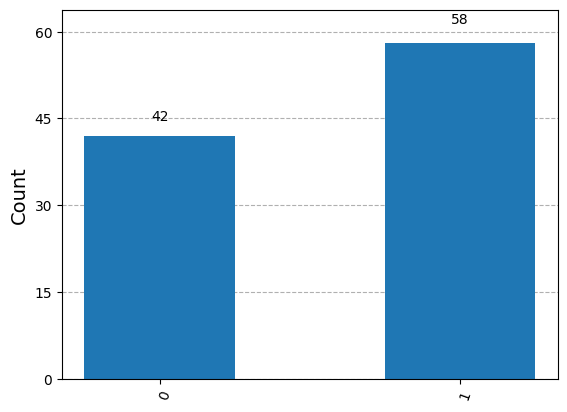

In [40]:
from qiskit.visualization import plot_histogram

result = v_1.sample_counts(100)
plot_histogram(result)

In [41]:
u1 = Statevector.from_label('0') #  tai konstruktorius pagal žymę
u2 = Statevector.from_label('+')
u3 = Statevector.from_label('r')
u4 = Statevector.from_label('l')

display(u1.draw('latex'))
display(u2.draw('latex'))
display(u3.draw('latex'))
display(u4.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [42]:
u1 = Statevector.from_label('01') #  tai konstruktorius pagal žymę
u2 = Statevector.from_label('+-')
u3 = Statevector.from_label('r+0')
u4 = Statevector.from_label('l+-')

display(u1.draw('latex'))
display(u2.draw('latex'))
display(u3.draw('latex'))
display(u4.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Operators

In [78]:
# paprastas pavyzdys: skaičiuojame H|0>
from qiskit.quantum_info import Operator

H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])

u = Statevector.from_label('0')
v = u.evolve(H)

display(v.draw("latex"))

<IPython.core.display.Latex object>

In [79]:
# ... dar pavyzdys
#  Galima naudoti žymes konstruojant:
# ‘I’, ‘X’, ‘Y’, ‘Z’, ‘H’, ‘S’, ‘T’, ‘0’,‘1’,‘+’,‘-’,‘r’,‘l’

I = Operator.from_label('I')
X = Operator.from_label('X')
Y = Operator.from_label('Y')

display(I.draw('latex'))
display(X.draw('latex'))
display(Y.draw('latex'))

#  Galima naudoti tenzorinę sandaugą konstruojant:

X2 = X ^ X
display(X2.draw('latex'))

IXH = I ^ X ^ H
display(IXH.draw('latex'))

u3 = Statevector.from_label('000')

IXHu3 = u3.evolve(IXH)
display(IXHu3.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [80]:
# ... dar pavyzdys: keitinių operatorius
#  ... neveikia kaip reikia :(
I = Operator.from_label('I')
I2 = I ^ I
u2 = Statevector.from_label('00')

display(I2.draw('latex', max_size=8))


I2p = I2.apply_permutation([1,2])
display((I2.apply_permutation([1,2])).draw('latex', max_size=8))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Schemes

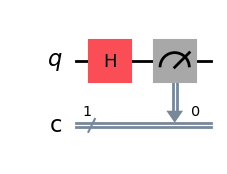

In [47]:
# Schema su vienu H ir vienu klasikiniu bitu
from qiskit import QuantumCircuit

scheme = QuantumCircuit(1,1)
scheme.h(0)
scheme.measure(0,0)

scheme.draw('mpl')

In [57]:
# Dabar bandome "paleisti" mūsų schemą ir pamatuoti jos rezultatus
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
masina = BasicSimulator()
transpiliuotaSchema = transpile(scheme, masina)
dazniai = masina.run(transpiliuotaSchema).result().get_counts()

print(dazniai)

{'0': 476, '1': 548}


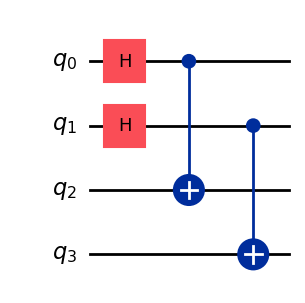

In [58]:
# Schema su dviem H ir CX vartais
from qiskit import QuantumCircuit

schema = QuantumCircuit(4)
schema.h(0)
schema.h(1)
schema.cx(0, 2)
schema.cx(1, 3)

schema.draw('mpl')

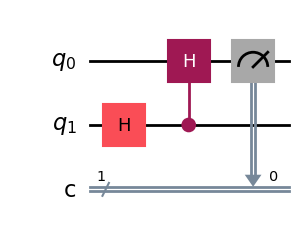

In [59]:
# Schema su vienu CH ir vienu klasikiniu bitu
from IPython.display import display, Markdown


schema = QuantumCircuit(2,1)
schema.h(1)
schema.ch(1,0)
schema.measure(0,0)

schema.draw('mpl')

In [60]:
masina = BasicSimulator()
transpiliuotaSchema = transpile(schema, masina)
dazniai = masina.run(transpiliuotaSchema).result().get_counts()

display(dazniai)

{'0': 770, '1': 254}

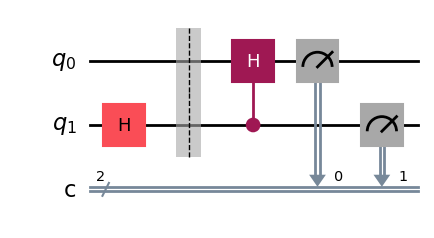

In [61]:
# ... dar vienas pavyzdys

schema = QuantumCircuit(2,2)
schema.h(1)
schema.barrier()
schema.ch(1,0)
schema.measure(0,0)
schema.measure(1,1)
schema.draw('mpl')

In [62]:
masina = BasicSimulator()
transpiliuotaSchema = transpile(schema, masina)
dazniai = masina.run(transpiliuotaSchema).result().get_counts()

display(dazniai)

{'10': 249, '00': 503, '11': 272}

In [63]:
# ... dar vienas pavyzdys

schema = QuantumCircuit(4,2)
schema.h(0)
schema.h(1)
schema.barrier()
schema.cx(0,2)
schema.cx(1,3)
schema.barrier()
schema.measure(2,0)
schema.measure(3,1)
#schema.draw('mpl')
print(schema)

masina = BasicSimulator()
transpiliuotaSchema = transpile(schema, masina)
dazniai = masina.run(transpiliuotaSchema).result().get_counts()
print(dazniai)

     ┌───┐ ░            ░       
q_0: ┤ H ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ H ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├──┼───░─┤M├───
           ░ └───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░──────┤ X ├─░──╫─┤M├
           ░      └───┘ ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1 
{'00': 248, '11': 257, '10': 271, '01': 248}


In [64]:
schema = QuantumCircuit(4,2)
schema.h(0)
schema.h(1)
schema.barrier()
schema.cx(0,2)
schema.cx(1,3)
schema.barrier()
schema.measure(0,0)
schema.measure(1,1)
#schema.draw('mpl')
print(schema)

masina = BasicSimulator()
transpiliuotaSchema = transpile(schema, masina)
dazniai = masina.run(transpiliuotaSchema).result().get_counts()
print(dazniai)

     ┌───┐ ░            ░ ┌─┐   
q_0: ┤ H ├─░───■────────░─┤M├───
     ├───┤ ░   │        ░ └╥┘┌─┐
q_1: ┤ H ├─░───┼────■───░──╫─┤M├
     └───┘ ░ ┌─┴─┐  │   ░  ║ └╥┘
q_2: ──────░─┤ X ├──┼───░──╫──╫─
           ░ └───┘┌─┴─┐ ░  ║  ║ 
q_3: ──────░──────┤ X ├─░──╫──╫─
           ░      └───┘ ░  ║  ║ 
c: 2/══════════════════════╩══╩═
                           0  1 
{'00': 255, '11': 251, '01': 251, '10': 267}


In [65]:
# ... dar vienas pavyzdys

schema = QuantumCircuit(4,1)
schema.h(0)
schema.h(1)
schema.barrier()
schema.ccx(0,1,2)
schema.barrier()
schema.measure(2,0)
#schema.measure(3,1)
#schema.draw('mpl')
print(schema)

masina = BasicSimulator()
transpiliuotaSchema = transpile(schema, masina)
dazniai = masina.run(transpiliuotaSchema).result().get_counts()
print(dazniai)

     ┌───┐ ░       ░    
q_0: ┤ H ├─░───■───░────
     ├───┤ ░   │   ░    
q_1: ┤ H ├─░───■───░────
     └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
q_3: ──────░───────░──╫─
           ░       ░  ║ 
c: 1/═════════════════╩═
                      0 
{'0': 773, '1': 251}


     ┌───┐ ░ ┌───┐     ┌───┐           ░       
q_0: ┤ H ├─░─┤ X ├──■──┤ X ├──■────────░───────
     ├───┤ ░ └───┘  │  ├───┤  │  ┌───┐ ░       
q_1: ┤ H ├─░────────■──┤ X ├──■──┤ X ├─░───────
     └───┘ ░      ┌─┴─┐└───┘  │  └───┘ ░ ┌─┐   
q_2: ──────░──────┤ X ├───────┼────────░─┤M├───
           ░      └───┘     ┌─┴─┐      ░ └╥┘┌─┐
q_3: ──────░────────────────┤ X ├──────░──╫─┤M├
           ░                └───┘      ░  ║ └╥┘
c: 2/═════════════════════════════════════╩══╩═
                                          0  1 


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

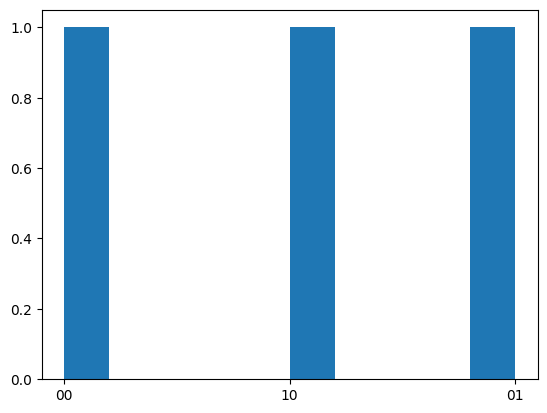

In [ ]:
# ... dar vienas pavyzdys

schema = QuantumCircuit(4,2)
schema.h(0)
schema.h(1)
schema.barrier()
schema.x(0)
schema.ccx(0,1,2)
schema.x(0)
schema.x(1)
schema.ccx(0,1,3)
schema.x(1)

schema.barrier()
schema.measure(2,0)
schema.measure(3,1)
#schema.draw('mpl')
print(schema)

masina = BasicSimulator()
transpiliuotaSchema = transpile(schema, masina)
dazniai = masina.run(transpiliuotaSchema).result().get_counts()

import matplotlib.pyplot as plt

plt.hist(dazniai)

In [77]:
schema = QuantumCircuit(2, 3)
schema.h(1)
schema.h(1)
schema.h(0)
print(schema)

     ┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ H ├┤ H ├
     └───┘└───┘
c: 3/══════════
               
